In [1]:
#Hello This is our test file


In [2]:
# created by TEAM SDPD Pull Over

import csv

files = ['actions_taken', 'basic_details', 'basis_of_search', 'basis_property_seizure', 'disability', 'evidence_found', 'gender', 'property_seized', 'race', 'reason_for_stop', 'stop_result']

def getFileData( filename ) :
    data = csv.reader(open('Data/' + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

for file in files :
    getFileData( file )


In [3]:
# Data Wrangling : creates indexed dict with compiled data from files listed
import csv

files = ['actions_taken', 'basic_details', 'basis_of_search', 'basis_property_seizure', 'disability', 'evidence_found', 'gender', 'property_seized', 'race', 'reason_for_stop', 'stop_result']

def getFileData( filename ) :
    data = csv.reader(open("Data/" + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

def getUidDict( files ) :
    uid_dict = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            uid_dict[uid] = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            for field in row :
                uid_dict[uid][field] = row[field]
    return uid_dict

def getIndexedDict( uid_dict ) :
    dict = {}
    for (index, uid) in enumerate( uid_dict ) :
        dict[index] = uid_dict[ uid ]
        dict[index]['uid'] = uid
    return dict

# Example of how to get first index of data
#print(getIndexedDict( getUidDict(files) )[0])


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.DataFrame(getIndexedDict( getUidDict(files)))


In [5]:
data = data.T
data

,action,agency,assignment,basis_for_search,basis_for_search_explanation,basisforpropertyseizure,beat,beat_name,block,cityname,...,resulttext,school_name,stop_id,stop_in_response_to_cfs,stopdate,stopduration,stoptime,street,type_of_property_seized,uid
0,None,SD,"Patrol, traffic enforcement, field operations",,,,122,Pacific Beach 122,700,SAN DIEGO,...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,,2443,0,2018-07-01 00:00:00,30,00:01:37,Grand Avenue,,2443_1
1,None,SD,"Patrol, traffic enforcement, field operations",,,,121,Mission Beach 121,,SAN DIEGO,...,22349(B) VC - EXC 55MPH SPEED:2 LANE RD (I) 54395,,2444,0,2018-07-01 00:00:00,10,00:03:34,NOBEL DRIVE,,2444_1
2,Curbside detention,SD,Other,,,,822,El Cerrito 822,4400,SAN DIEGO,...,,,2447,1,2018-07-01 00:00:00,15,00:05:43,59th Street,,2447_1
3,Curbside detention,SD,Other,,,,822,El Cerrito 822,4400,SAN DIEGO,...,,,2447,1,2018-07-01 00:00:00,15,00:05:43,59th Street,,2447_2
4,None,SD,"Patrol, traffic enforcement, field operations",,,,614,Ocean Beach 614,4800,SAN DIEGO,...,,,2448,0,2018-07-01 00:00:00,5,00:19:06,NIAGARA AVE,,2448_1
5,Search of person was conducted,SD,"Patrol, traffic enforcement, field operations",Incident to arrest,subject was transported to detox and was searc...,,115,University City 115,4500,SAN DIEGO,...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,,2449,1,2018-07-01 00:00:00,15,00:03:00,la jolla village dr,,2449_1
6,Handcuffed or flex cuffed,SD,Other,,,,122,Pacific Beach 122,800,SAN DIEGO,...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,,2451,0,2018-07-01 00:00:00,20,00:24:02,Thomas,,2451_1
7,Handcuffed or flex cuffed,SD,"Patrol, traffic enforcement, field operations",Incident to arrest,INCIDENT TO ARREST,Impound of vehicle,446,Lincoln Park 446,4800,SAN DIEGO,...,245(A)(1) PC - ADW NOT FIREARM (F) 13219,,2453,0,2018-07-01 00:00:00,120,00:31:19,LOGAN AVENUE,Vehicle,2453_1
8,None,SD,Gang enforcement,,,,826,Colina Del Sol 826,4100,SAN DIEGO,...,,,2454,0,2018-07-01 00:00:00,3,00:33:19,estrella,,2454_1
9,Handcuffed or flex cuffed,SD,"Patrol, traffic enforcement, field operations",,,,122,Pacific Beach 122,1100,SAN DIEGO,...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,,2455,1,2018-07-01 00:00:00,20,00:11:00,hornblend st,,2455_1


In [6]:
data.columns

Index(['action', 'agency', 'assignment', 'basis_for_search',
       'basis_for_search_explanation', 'basisforpropertyseizure', 'beat',
       'beat_name', 'block', 'cityname', 'code', 'consented', 'contraband',
       'disability', 'exp_years', 'gend', 'gend_nc', 'gender',
       'gender_nonconforming', 'highway_exit', 'intersection', 'isschool',
       'isstudent', 'land_mark', 'officer_assignment_key', 'ori',
       'perceived_age', 'perceived_gender', 'perceived_lgbt',
       'perceived_limited_english', 'pid', 'race', 'reason_for_stop',
       'reason_for_stop_code_text', 'reason_for_stop_detail',
       'reason_for_stop_explanation', 'reason_for_stopcode', 'result',
       'resultkey', 'resulttext', 'school_name', 'stop_id',
       'stop_in_response_to_cfs', 'stopdate', 'stopduration', 'stoptime',
       'street', 'type_of_property_seized', 'uid'],
      dtype='object')

In [7]:
data['perceived_age'] = pd.to_numeric(data['perceived_age'])
data['perceived_age'].max()

120

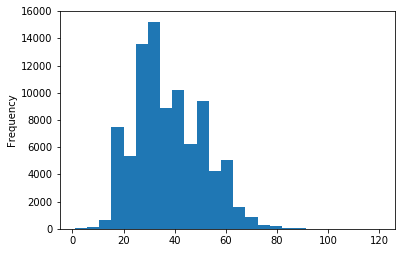

In [8]:

#data = data.dropna()

data['perceived_age'].plot.hist(bins=25)
f1 = plt.gcf()

In [ ]:
data['race'].apply(pd.value_counts).plot(kind='bar', subplots=True)
f2 = plt.gcf()